In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fods_1.csv to fods_1 (1).csv


In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
!pip install ipympl

df = pd.read_csv(io.BytesIO(uploaded['fods_1.csv']))

shuffled = df.sample(frac = 1).reset_index()
matrix = np.array(shuffled.values, 'float')
training = matrix[0:438, :]
testing = matrix[439:547,:]

y = training[:,3]
x = training[:,1:3]
x1 = training[:,1]
x2 = training[:,2]

y_test = testing[:,3]
x_test = testing[:,1:3]
x1_test = testing[:,1]
x2_test = testing[:,2]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# from google.colab import output
# output.disable_custom_widget_manager()

In [ ]:
def cost(X, Y, W):
  J = (1 / (2 * len(Y))) * np.sum((np.dot(W.T, X) - Y) ** 2)
  # print("cost:" + str(J))
  return J

In [ ]:
def gradDescent(x, y, w, alpha, iter):
  cost_new = cost(x, y, w)
  cost_hist = [cost_new]

  for _ in range(iter):
    cost_old = cost_new
    diff = np.dot(w.T, x) - y
    grad = (1 / len(y)) * np.dot(x, diff.T)
    w = w - alpha * grad
    cost_new = cost(x, y, w)
    cost_hist.append(cost_new)
    # if(abs(cost_old - cost_new) <= 10 ** (-20)):
    #   break

  return w, cost_hist

In [ ]:
def stochGradDescent(x, y, w, alpha):
  cost_new = cost(x[:, 0:1], y[0, 0:1], w)
  cost_hist = [cost_new]

  for exNo in range(x.shape[1]):
    cost_old = cost_new
    x_arr = x[:, exNo : exNo + 1]
    y_arr = y[0, exNo : exNo + 1]
    diff = np.dot(w.T, x_arr) - y_arr
    grad = np.dot(x_arr, diff.T)
    w = w - alpha * grad
    cost_new = cost(x_arr, y_arr, w)
    cost_hist.append(cost_new)
    # cost(x, y, W_mod)
    # print(w)
    # if(abs(cost_old - cost_new) <= 10 ** (-20)):
    #   break
  
  return w, cost_hist

In [ ]:
def differentiate_w(w, q):
  dw = [0]
  if(q <= 1):
    for i in range(1, 3):
      if(w[i, 0] > 0):
        dw.append(1)
      else:
        dw.append(-1)
      if(q == 0.5):
        dw[i] = dw[i] * 0.5 / (np.sqrt(abs(w[i, 0])))
  else:
    dw = q * (np.power(w, q - 1))
    dw[0] = 0

  return np.array(dw).reshape(-1, 1)

In [ ]:
def gradDescent_regularized(x, y, w, alpha, iters, q, lamda):
  #w_reg = w[1:, :]
  # print(w)
  #print(w_reg)
  cost_new = cost_regularized(x, y, w, q, lamda)
  for _ in range(iters):
    cost_old = cost_new
    diff = np.dot(w.T, x) - y
    grad = (1 / len(y)) * (np.dot(x, diff.T) + 0.5 * lamda * differentiate_w(w, q))
    w = w - alpha * grad
    # print(differentiate_w(w, q))
    # break
    # print("w is ")
    # print(w)
    cost_new = cost(x, y, w)
    # if(abs(cost_old - cost_new) <= 10 ** (-10)):
    #   print("Optimal found")
    #   break
  return w



In [ ]:
def cost_regularized(X, Y, w, q, lamda):
  w_reg = w[1:, :]
  J = (1 / (2 * len(Y))) * np.sum((np.dot(w.T, X) - Y) ** 2) + (0.5 * lamda) * np.sum(np.power(abs(w_reg), q))
  return J


In [ ]:
def makePoly(x1, x2, degree, df, rdm):
  df_new = df.copy()
  # x1 = np.array(x1)
  # x2 = np.array(x2)
  for i in range(degree + 1):
    for j in range(degree + 1 - i):
      df_new = np.concatenate((df_new, np.reshape( (x1**i) * (x2**j), (-1, 1) ) ), axis = 1)
  
  if(rdm == True):
    w = np.random.rand(df_new[:, 2:].shape[1], 1)
  else:
    w = np.zeros((df_new[:, 2:].shape[1], 1))
  
  return w, df_new[:, 2:]
      
# alpha = 0.5
# w = np.zeros(x.shape[1])
# grad_descent(x, y, w, alpha)
# for i in range(2,6):
#   for j in range (0, i+1):
#     term1 = np.power(x1, j)
#     term2 = np.power(x2, i - j)
#     term = np.multiply(term1, term2)
#     x = np.concatenate((x, term), axis=1)
#     w = np.zeros(x.shape[1])
#   grad_descent(x,y,w,alpha)

1B a Gradient Descent

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


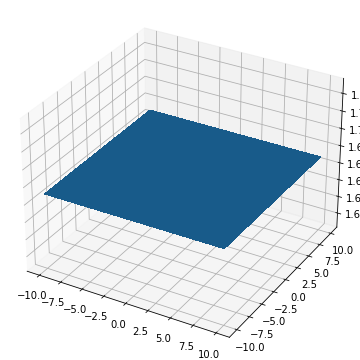

1


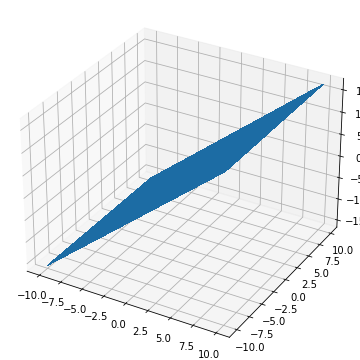

2


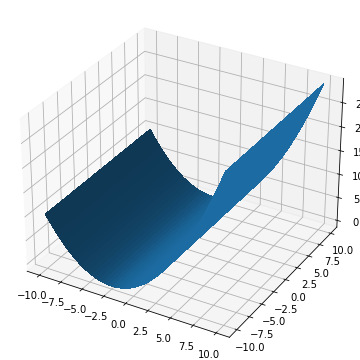

3


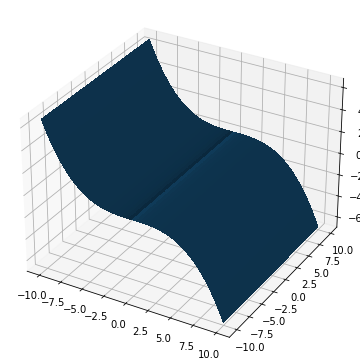

4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


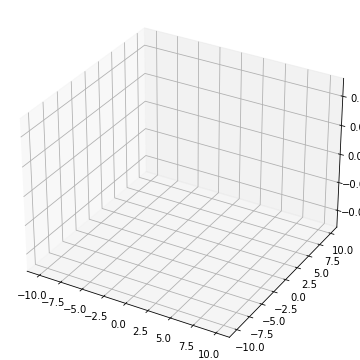

5


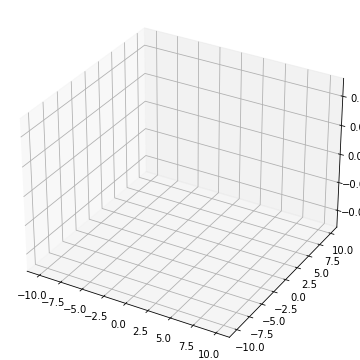

6


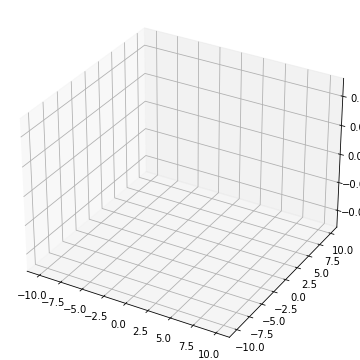

7


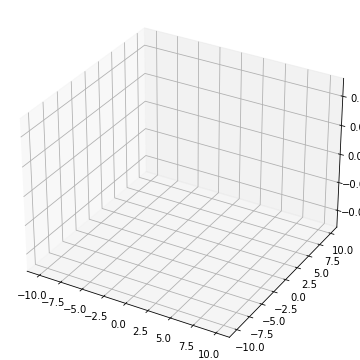

8


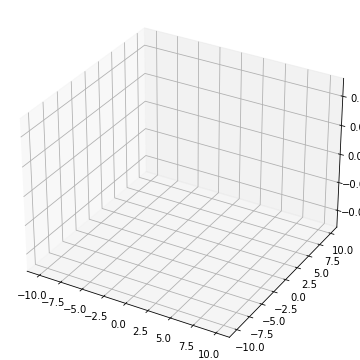

9


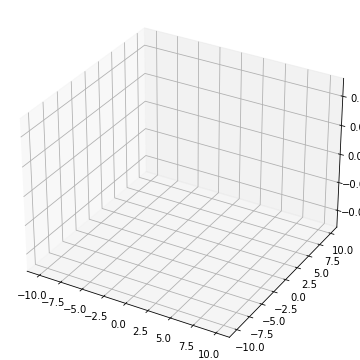

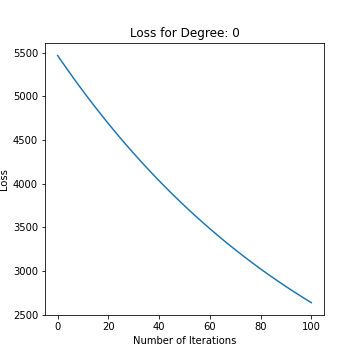

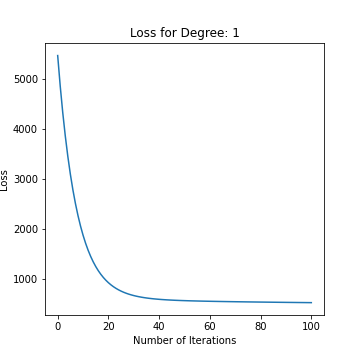

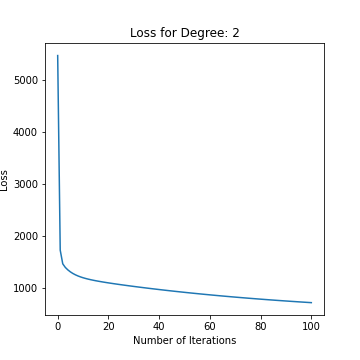

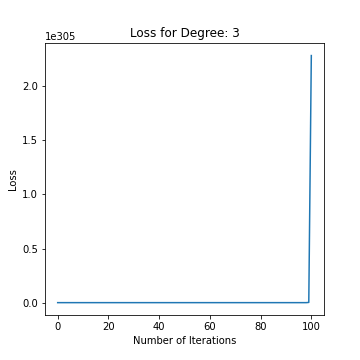

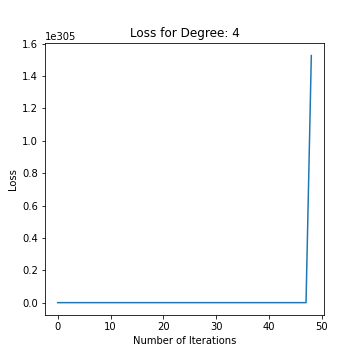

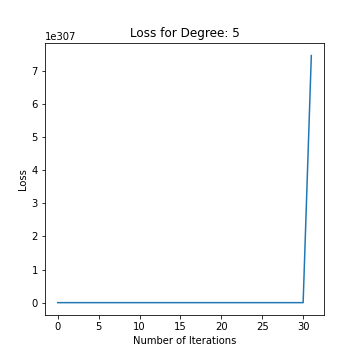

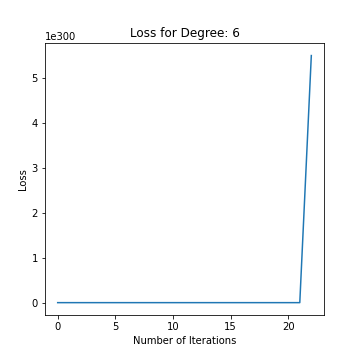

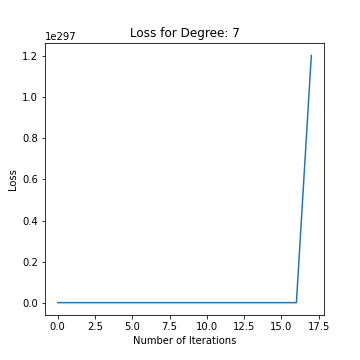

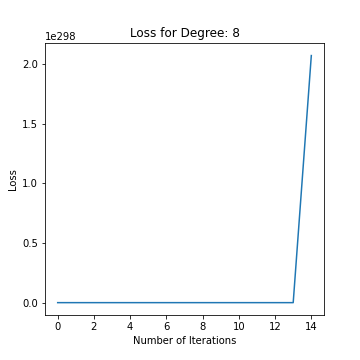

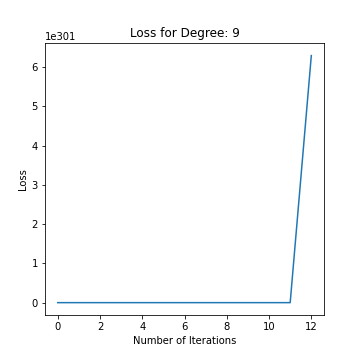

[2639.35054786526, 536.5078631803494, 713.4726666066374, 2.282249721794944e+305, nan, nan, nan, nan, nan, nan]
[547.6214573456267, 96.66323649337951, 135.0107058621766, 4.3674329212668257e+304, nan, nan, nan, nan, nan, nan]


In [ ]:
# runner code for batch gradient descent
train_err = []
test_err = []
W_list = []

cost_history_each_deg = []

for deg in range(0, 10):
  print(deg)
  W, X = makePoly(x[:, 0], x[:, 1], deg, x, False)
  X = X.T
  
  # print(W.shape)
  # print(X.shape)
  
  W_mod, cost_hist_deg = gradDescent(X, y.reshape(1, -1), W, 1e-5, 100)
  
  cost_history_each_deg.append(cost_hist_deg)
  
  W_list.append(W_mod)
  train_err.append( cost(X, y.reshape(1, -1), W_mod) )
  
  W_mod_test, X_test = makePoly(x_test[:, 0], x_test[:, 1], deg, x_test, False)
  X_test = X_test.T
  
  # print(W_mod.shape)
  # print(X_test.shape)

  # plotting surface

  x1_p = np.arange(-10, 10, 0.025).reshape(-1, 1)
  x2_p = np.arange(-10, 10, 0.025).reshape(-1, 1)
  x_p = np.concatenate((x1_p, x2_p), axis = 1)

  x1_p, x2_p = np.meshgrid(x1_p, x2_p)

  _, X_p = makePoly(x_p[:, 0], x_p[:, 1], deg, x_p, False)
  X_p = X_p.T

  # print(X_p)
  # print(X_p.shape)

  %matplotlib widget

  fig = plt.figure(figsize = (5, 5))
  ax = Axes3D(fig)
  # fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10, 10))

  ax.plot_surface(x1_p, x2_p, np.dot(W_mod.T, X_p), antialiased = False)

  plt.show()
  
  test_err.append( cost(X_test, y_test.reshape(1, -1), W_mod) )

# plotting loss

for i in range(len(cost_history_each_deg)):
  plt.figure(figsize = (5, 5))
  plt.plot(cost_history_each_deg[i])
  plt.title("Loss for Degree: " + str(i))
  plt.ylabel("Loss")
  plt.xlabel("Number of Iterations")
  plt.show()

print(train_err)
print(test_err)

1B a Stochastic Gradient Descent

0




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


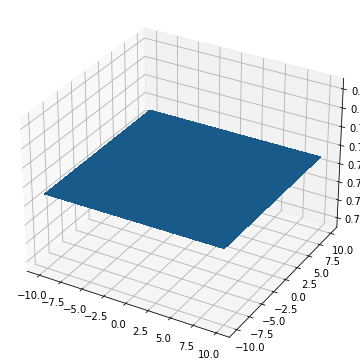

1




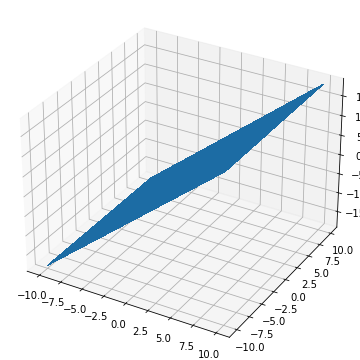

2




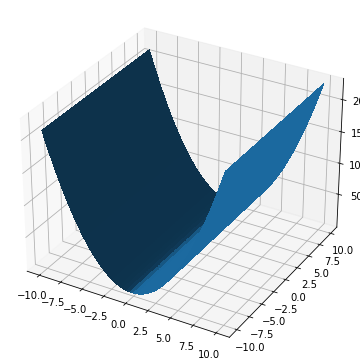

3




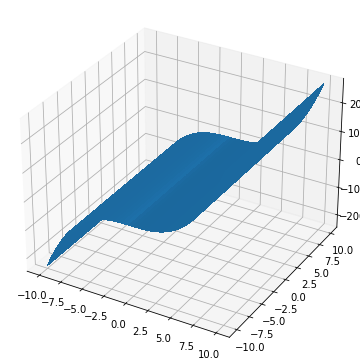

4




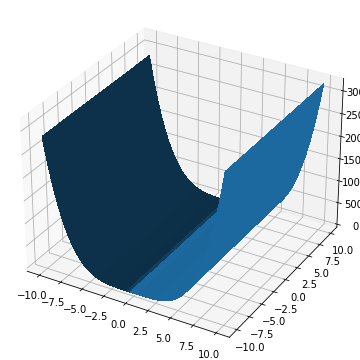

5




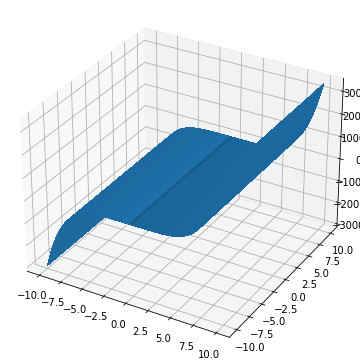

6




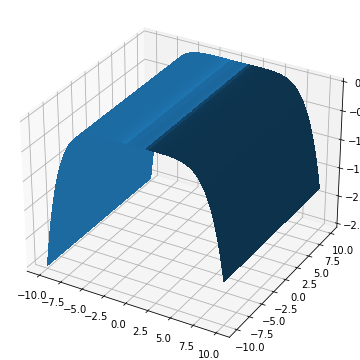

7




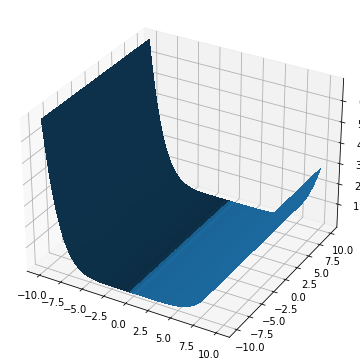

8




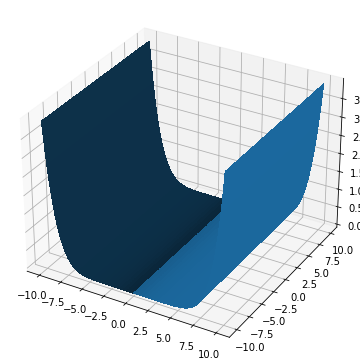

9




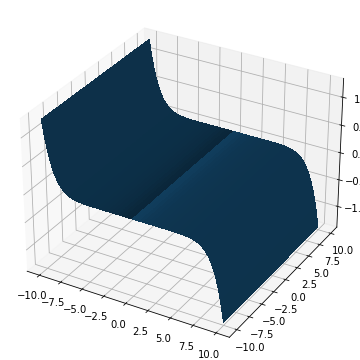

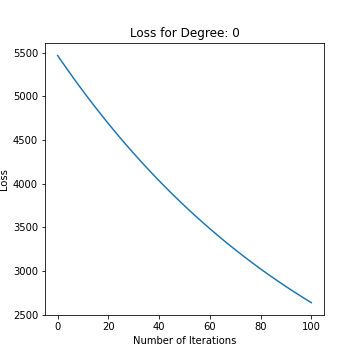

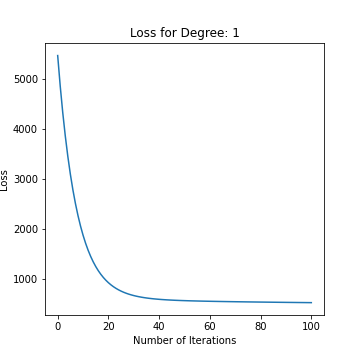

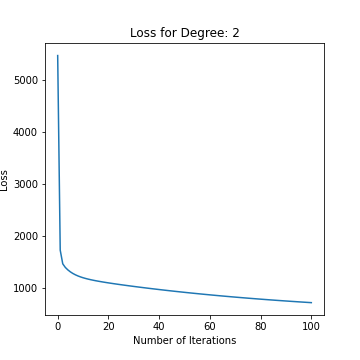

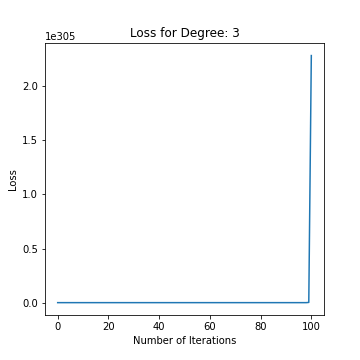

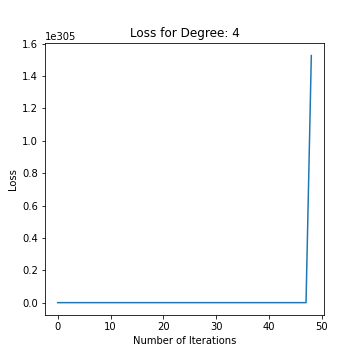

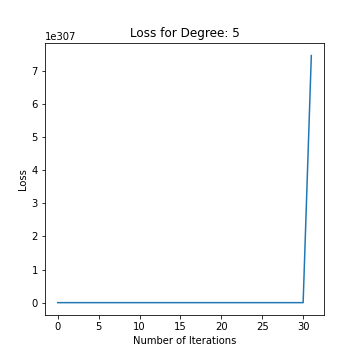

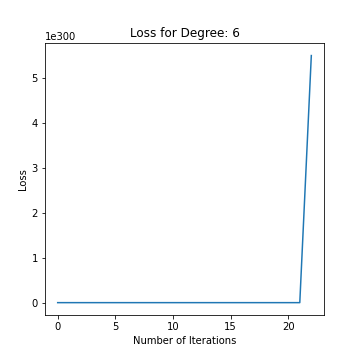

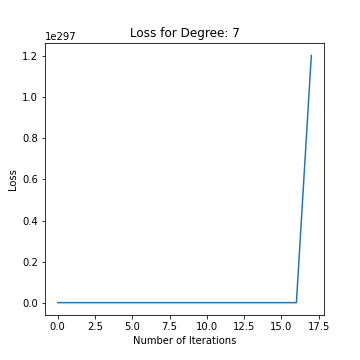

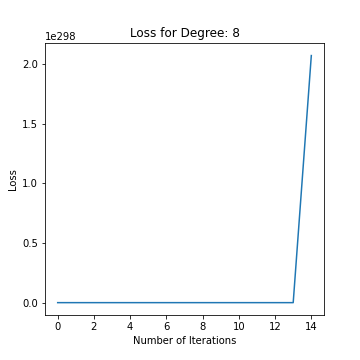

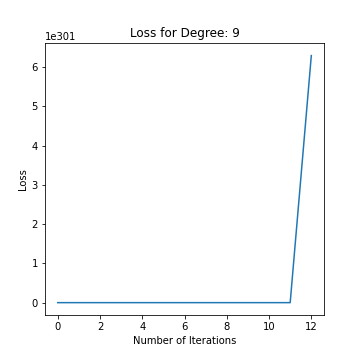

[4002.289394163635, 648.7666666696257, 75697.44978221368, 2798698.8935584854, 106463115.2566764, 5714864842.440651, 636852740982.8347, 1328546475842.3755, 6.377394500033371e+63, 3.356268132533718e+224]
[859.611720983231, 125.54414391571743, 17577.071988143638, 580059.8677279647, 16352695.477541642, 507912865.6934653, 22688051508.15853, 11916304959.194752, 6.827219950544973e+61, 1.9576473287688227e+222]


In [ ]:
#runner code for stochastic gradient descent

train_err_s = []
test_err_s = []
W_list_s = []

cost_history_each_deg_sgd = []

for deg in range(0, 10):
  print(deg)
  W_s, X = makePoly(x[:, 0], x[:, 1], deg, x, True)
  X = X.T
  
  # print(W_s.shape)
  # print(X.shape)
  
  W_mod_s, cost_hist_deg_sgd = stochGradDescent(X, y.reshape(1, -1), W_s, 1e-11)

  cost_history_each_deg_sgd.append(cost_hist_deg_sgd)

  W_list_s.append(W_mod_s)
  print("\n")
  train_err_s.append( cost(X, y.reshape(1, -1), W_mod_s) )
  W_mod_test, X_test = makePoly(x_test[:, 0], x_test[:, 1], deg, x_test, True)
  X_test = X_test.T
  
  # print(W_mod_s.shape)
  # print(X_test.shape)

  # plotting surface

  x1_p = np.arange(-10, 10, 0.025).reshape(-1, 1)
  x2_p = np.arange(-10, 10, 0.025).reshape(-1, 1)
  x_p = np.concatenate((x1_p, x2_p), axis = 1)

  x1_p, x2_p = np.meshgrid(x1_p, x2_p)

  _, X_p = makePoly(x_p[:, 0], x_p[:, 1], deg, x_p, False)
  X_p = X_p.T

  # print(X_p)
  # print(X_p.shape)

  %matplotlib widget

  fig = plt.figure(figsize = (5, 5))
  ax = Axes3D(fig)
  # fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10, 10))

  ax.plot_surface(x1_p, x2_p, np.dot(W_mod_s.T, X_p), antialiased = False)

  plt.show()

  test_err_s.append( cost(X_test, y_test.reshape(1, -1), W_mod_s) )


for i in range(len(cost_history_each_deg_sgd)):
  plt.figure(figsize = (5, 5))
  plt.plot(cost_history_each_deg[i])
  plt.title("Loss for Degree: " + str(i))
  plt.ylabel("Loss")
  plt.xlabel("Number of Iterations")
  plt.show()

print(train_err_s)
print(test_err_s)

1B b Regularization and deg 1

In [ ]:
# batch gradient descent with regularization

q = [0.5, 1, 2, 4]
l = np.linspace(0, 0.9, 10)
d = {}

W_optimal_q = []

for qi in range(len(q)):
  W_r, X = makePoly(x[:, 0], x[:, 1], 1, x, True)
  X = X.T
  
  lambda_errors_train = []
  lambda_errors_test = []
  
  print("q:" + str(q[qi]))
  # print(W_r.shape)
  # print(X.shape)
  
  for li in range(len(l)):
    # print("l:" + str(l[li]))
    
    W_mod_ql = gradDescent_regularized(X, y.reshape(1, -1), W_r, 1e-8, 100, q[qi], l[li])

    lambda_errors_train.append( cost_regularized(X, y.reshape(1, -1), W_mod_ql, q[qi], l[li]) )

    W_mod_test, X_test = makePoly(x_test[:, 0], x_test[:, 1], 1, x_test, True)
    X_test = X_test.T

    lambda_errors_test.append( cost_regularized(X_test, y_test.reshape(1, -1), W_mod_ql, q[qi], l[li]) )
  
  print(lambda_errors_train)
  print(lambda_errors_test)

  d['q = ' + str(q[qi]) + ': train'] = lambda_errors_train
  d['q = ' + str(q[qi]) + ': test'] = lambda_errors_test
    

    # print(W_mod_ql.shape)
    # print(X_test.shape)
  
  for k, v in d.items():
    print(str(k) + ':' + str(v))

q:0.5
[705.7437439163491, 705.8413228183856, 705.9389017178129, 706.0364806146299, 706.1340595088379, 706.2316384004354, 706.3292172894239, 706.4267961758026, 706.5243750595714, 706.6219539407314]
[143.76064162890592, 143.85824603304195, 143.95585043456285, 144.05345483346827, 144.15105922975854, 144.24866362343323, 144.34626801449286, 144.44387240293702, 144.54147678876592, 144.6390811719797]
q = 0.5: train:[705.7437439163491, 705.8413228183856, 705.9389017178129, 706.0364806146299, 706.1340595088379, 706.2316384004354, 706.3292172894239, 706.4267961758026, 706.5243750595714, 706.6219539407314]
q = 0.5: test:[143.76064162890592, 143.85824603304195, 143.95585043456285, 144.05345483346827, 144.15105922975854, 144.24866362343323, 144.34626801449286, 144.44387240293702, 144.54147678876592, 144.6390811719797]
q:1
[1261.552128595769, 1261.5906232461216, 1261.6291178865345, 1261.6676125170065, 1261.706107137539, 1261.7446017481325, 1261.783096348786, 1261.8215909395014, 1261.8600855202756, 1

In [ ]:
# # batch gradient descent with regularization

# W_list_r = []

# q = [0.5, 1, 2, 4]
# l = np.linspace(0.1, 0.9, 9)

# for q_elt in q:
#   print("For q = " , q_elt)
#   W, X = makePoly(x[:, 0], x[:, 1], 1, x, True)
#   X = X.T
#   W_mod_test, X_test = makePoly(x_test[:, 0], x_test[:, 1], 1, x_test, True)
#   X_test = X_test.T
#   train_err_r = []
#   test_err_r = []
#   # print(W.shape)
#   # print(X.shape)
#   for lamda in l:
#     W_mod_r = gradDescent_regularized(X, y.reshape(1, -1), W, 1e-8, 100, q_elt, lamda)
#     W_list_r.append(W_mod_r)
#     # print("\n")
#     train_err_r.append(cost(X, y.reshape(1, -1), W_mod_r))
#     test_err_r.append(cost(X_test, y_test.reshape(1, -1), W_mod_r))
#   print(train_err_r)
#   print(test_err_r)
#   # print(W_list_r)
